In [1]:
!which python

/home/paperspace/anaconda3/envs/fastai/bin/python


In [2]:
import enum
import math
import pdb
import platform
import time

import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm import tqdm_notebook

from ssdmultibox.criterion import SSDLoss
from ssdmultibox.datasets import PascalDataset, TrainPascalFlatDataset, device
from ssdmultibox.models import SSDModel
from ssdmultibox import utils

import matplotlib.pyplot as plt
plt.ion()

In [3]:
device

device(type='cuda', index=0)

In [4]:
losses = {'total':[], 'loc':[], 'conf':[]}

In [27]:
model = SSDModel().to(device)

In [28]:
LR = 1e-2

criterion = SSDLoss(alpha=.2)
optimizer = optim.SGD(model.parameters(), lr=LR, momentum=0.9, weight_decay=0.0005)
current_time = time.time()

In [29]:
NUM_WORKERS = utils.get_cpu_count()

if platform.system() == 'Darwin': # Mac
    BATCH = 4
    SHUFFLE = False
else:
    BATCH = 32
    SHUFFLE = True

train_dataset = TrainPascalFlatDataset()
dataloader = DataLoader(train_dataset, batch_size=BATCH, shuffle=SHUFFLE, num_workers=NUM_WORKERS)

In [30]:
EPOCHS = 2

for epoch in range(EPOCHS):
    steps = math.ceil(len(train_dataset) / BATCH)
    for i in tqdm_notebook(range(steps)):
        image_ids, ims, gt_bbs, gt_cats = next(iter(dataloader))

        # put data on device
        ims, gt_bbs, gt_cats = PascalDataset.to_device(ims, gt_bbs, gt_cats)

        # zero out gradients
        optimizer.zero_grad()

        # forward pass
        preds = model(ims)
        loss, loc_loss, conf_loss = criterion(preds, (gt_bbs, gt_cats))

        # backward pass
        loss.backward()
        optimizer.step()

        # stats
        if i % 5 == 0:
            print('step: {} loss: {:.4f} time: {:.4f}'.format(i, loss.item(), time.time() - current_time))
            current_time = time.time()
            losses['total'].append(loss.item())
            losses['loc'].append(loc_loss.item())
            losses['conf'].append(conf_loss.item())

pos_loss: 751.1353 neg_hard_mining_loss: 2374.8296
n: 247.0 bbs_loss: 14158.5459 cats_loss: 3125.9651
step: 0 loss: 24.1201 time: 7.6471
pos_loss: 858.0261 neg_hard_mining_loss: 2683.0083
n: 282.0 bbs_loss: 15729.2295 cats_loss: 3541.0352
pos_loss: 654.6313 neg_hard_mining_loss: 2022.3760
n: 215.0 bbs_loss: 12306.2021 cats_loss: 2677.0078
pos_loss: 669.2743 neg_hard_mining_loss: 2037.6437
n: 220.0 bbs_loss: 15384.2686 cats_loss: 2706.9182
pos_loss: 855.3338 neg_hard_mining_loss: 2588.8809
n: 281.0 bbs_loss: 16231.6836 cats_loss: 3444.2156
pos_loss: 614.8682 neg_hard_mining_loss: 1856.2102
n: 202.0 bbs_loss: 12525.1240 cats_loss: 2471.0781
step: 5 loss: 24.6342 time: 12.1923
pos_loss: 635.3674 neg_hard_mining_loss: 1918.3046
n: 209.0 bbs_loss: 11660.5371 cats_loss: 2553.6721
pos_loss: 782.9325 neg_hard_mining_loss: 2355.5674
n: 257.0 bbs_loss: 12725.8047 cats_loss: 3138.4995
pos_loss: 605.6360 neg_hard_mining_loss: 1821.4950
n: 199.0 bbs_loss: 12584.7568 cats_loss: 2427.1313
pos_loss: 7

pos_loss: 581.6236 neg_hard_mining_loss: 1136.0428
n: 200.0 bbs_loss: 13714.1963 cats_loss: 1717.6661
step: 75 loss: 22.3025 time: 11.7679
pos_loss: 714.9816 neg_hard_mining_loss: 1330.6277
n: 238.0 bbs_loss: 15099.4414 cats_loss: 2045.6094
pos_loss: 523.1395 neg_hard_mining_loss: 954.7386
n: 172.0 bbs_loss: 12229.3027 cats_loss: 1477.8782
pos_loss: 765.9509 neg_hard_mining_loss: 1397.3492
n: 256.0 bbs_loss: 15294.5879 cats_loss: 2163.3000


pos_loss: 645.7473 neg_hard_mining_loss: 1190.0693
n: 220.0 bbs_loss: 13831.6377 cats_loss: 1835.8169
step: 0 loss: 20.9188 time: 10.0296
pos_loss: 593.3536 neg_hard_mining_loss: 1006.9501
n: 189.0 bbs_loss: 11828.5859 cats_loss: 1600.3035
pos_loss: 793.8298 neg_hard_mining_loss: 1503.3176
n: 291.0 bbs_loss: 15063.7725 cats_loss: 2297.1472
pos_loss: 733.8497 neg_hard_mining_loss: 1355.1049
n: 269.0 bbs_loss: 14415.5479 cats_loss: 2088.9543
pos_loss: 876.4360 neg_hard_mining_loss: 1502.3867
n: 306.0 bbs_loss: 18173.3613 cats_loss: 2378.8232
pos_loss: 683.2002 neg_hard_mining_loss: 1020.6032
n: 213.0 bbs_loss: 15084.3389 cats_loss: 1703.8035
step: 5 loss: 22.1628 time: 11.9502
pos_loss: 668.7312 neg_hard_mining_loss: 1079.8352
n: 224.0 bbs_loss: 14433.1289 cats_loss: 1748.5664
pos_loss: 921.2881 neg_hard_mining_loss: 1361.6851
n: 292.0 bbs_loss: 17294.1484 cats_loss: 2282.9736
pos_loss: 809.9641 neg_hard_mining_loss: 1136.2556
n: 249.0 bbs_loss: 15898.6895 cats_loss: 1946.2197
pos_loss: 

step: 75 loss: 17.1592 time: 12.4737
pos_loss: 783.1266 neg_hard_mining_loss: 408.2199
n: 221.0 bbs_loss: 15334.0107 cats_loss: 1191.3467
pos_loss: 837.2722 neg_hard_mining_loss: 394.1830
n: 222.0 bbs_loss: 10593.3291 cats_loss: 1231.4554
pos_loss: 1198.0712 neg_hard_mining_loss: 534.7455
n: 331.0 bbs_loss: 20430.1133 cats_loss: 1732.8169


pos_loss: 903.1190 neg_hard_mining_loss: 426.4949
n: 249.0 bbs_loss: 14164.2871 cats_loss: 1329.6138
step: 0 loss: 16.7168 time: 10.5817
pos_loss: 723.7776 neg_hard_mining_loss: 344.6512
n: 197.0 bbs_loss: 10137.3604 cats_loss: 1068.4287
pos_loss: 1039.2052 neg_hard_mining_loss: 446.4616
n: 263.0 bbs_loss: 16754.8457 cats_loss: 1485.6667
pos_loss: 782.4348 neg_hard_mining_loss: 384.7690
n: 225.0 bbs_loss: 13457.6553 cats_loss: 1167.2036
pos_loss: 824.8126 neg_hard_mining_loss: 395.7396
n: 240.0 bbs_loss: 14101.0312 cats_loss: 1220.5525
pos_loss: 925.3786 neg_hard_mining_loss: 414.9301
n: 259.0 bbs_loss: 12785.5039 cats_loss: 1340.3087
step: 5 loss: 15.0479 time: 12.2435
pos_loss: 915.5045 neg_hard_mining_loss: 409.7379
n: 254.0 bbs_loss: 15295.8721 cats_loss: 1325.2426
pos_loss: 1011.3618 neg_hard_mining_loss: 422.7390
n: 256.0 bbs_loss: 13836.7334 cats_loss: 1434.1007
pos_loss: 1013.9667 neg_hard_mining_loss: 416.9819
n: 282.0 bbs_loss: 19162.1621 cats_loss: 1430.9487
pos_loss: 867.42

step: 75 loss: 15.3681 time: 12.4201
pos_loss: 785.4819 neg_hard_mining_loss: 214.2720
n: 201.0 bbs_loss: 13526.8867 cats_loss: 999.7537
pos_loss: 842.0032 neg_hard_mining_loss: 278.1374
n: 228.0 bbs_loss: 12190.8027 cats_loss: 1120.1405
pos_loss: 935.5054 neg_hard_mining_loss: 300.8402
n: 247.0 bbs_loss: 12043.0107 cats_loss: 1236.3453


pos_loss: 930.2969 neg_hard_mining_loss: 265.8757
n: 239.0 bbs_loss: 10981.0068 cats_loss: 1196.1726
step: 0 loss: 14.1940 time: 10.5894
pos_loss: 1006.4645 neg_hard_mining_loss: 264.1432
n: 255.0 bbs_loss: 14802.5654 cats_loss: 1270.6078
pos_loss: 840.8904 neg_hard_mining_loss: 205.1278
n: 211.0 bbs_loss: 14399.5996 cats_loss: 1046.0183
pos_loss: 960.5139 neg_hard_mining_loss: 254.2460
n: 241.0 bbs_loss: 13010.5488 cats_loss: 1214.7599
pos_loss: 778.5129 neg_hard_mining_loss: 242.9964
n: 200.0 bbs_loss: 12985.3135 cats_loss: 1021.5095
pos_loss: 717.7402 neg_hard_mining_loss: 224.7656
n: 186.0 bbs_loss: 10792.5078 cats_loss: 942.5058
step: 5 loss: 16.6721 time: 12.2019
pos_loss: 910.4495 neg_hard_mining_loss: 253.2801
n: 231.0 bbs_loss: 14285.6787 cats_loss: 1163.7296
pos_loss: 743.8481 neg_hard_mining_loss: 204.0572
n: 180.0 bbs_loss: 10140.1113 cats_loss: 947.9053
pos_loss: 805.9648 neg_hard_mining_loss: 265.1870
n: 220.0 bbs_loss: 12107.9883 cats_loss: 1071.1519
pos_loss: 725.9571 n

step: 75 loss: 16.7379 time: 12.0811
pos_loss: 1022.8596 neg_hard_mining_loss: 267.1085
n: 275.0 bbs_loss: 13108.8633 cats_loss: 1289.9680
pos_loss: 703.6921 neg_hard_mining_loss: 181.7112
n: 184.0 bbs_loss: 12500.7500 cats_loss: 885.4033
pos_loss: 813.8990 neg_hard_mining_loss: 272.0757
n: 238.0 bbs_loss: 15561.9023 cats_loss: 1085.9747


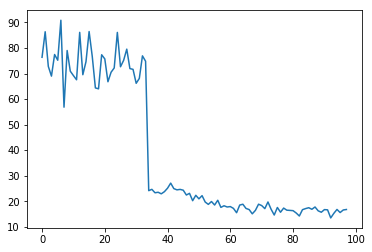

In [31]:
plt.plot(losses['total'])

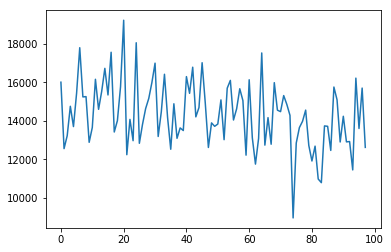

In [32]:
plt.plot(losses['loc'])

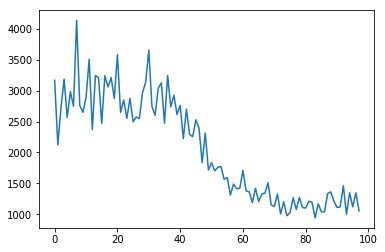

In [33]:
plt.plot(losses['conf'])

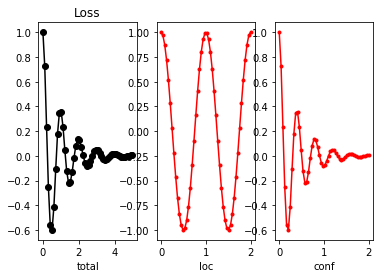

In [13]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(1, 3, 1)
plt.plot(x1, y1, 'ko-')
plt.title('Loss')
plt.xlabel('total')

plt.subplot(1, 3, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('loc')

plt.subplot(1, 3, 3)
plt.plot(x2, y1, 'r.-')
plt.xlabel('conf')


plt.show()

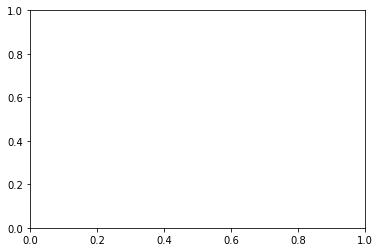

In [14]:
plt.subplot()